Librerías


In [77]:
#Librería para lectura de archivos de entorno:
import os
from dotenv import load_dotenv

#Librerías para cálculo y gráficas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Librerías para la conexión a BBDD:
import mysql.connector as sql
from mysql.connector import Error

from sqlalchemy import create_engine

#Librería para gráficos interactivos en python
import plotly.graph_objects as go
import plotly.express as px

In [78]:
diractual = os.getcwd()
diractual

'/Users/Edicion/Documents/Estudios/ProjecteIT/ProjecteData/Equip_G/Scripts'

Importación del csv del dataframe de limpieza.

Esta celda y la siguiente se pueden eliminar en caso de fusionarla con otros scripts.

In [79]:
df = pd.read_csv(r'../Data/2025_04_22_Sprint02.csv')

In [80]:
df.head()

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,normalized_amenities,days_occupied,occupancy_rate,supera_80
0,17249166,Arquitecte gaudi,Nuevo apartamento c�ntrico con buenos acabados...,109461701,Roses,NaN,Entire home/apt,5,1.0,2.0,...,100.0,FALSO,9.0,spain,girona,2021-02-27,"iron, host greets you, long term stays allowed...",30,100.000000,True
1,23040910,Apartamento luminoso cerca del mar,Apartamento muy bonito a 200m de la playa y en...,17816909,Ciutadella de Menorca,NaN,Entire home/apt,4,1.0,1.0,...,90.0,VERDADERO,3.0,spain,menorca,2021-02-27,"crib, high chair, balcony, microwave, essentia...",1,3.333333,True
2,31968299,Villenpark Playa Arena House Flamenco,House with incredible garden and beautiful vie...,173153149,Lloret de Mar,NaN,Entire home/apt,5,1.0,2.0,...,NaN,VERDADERO,NaN,spain,girona,2021-02-27,"balcony, nespresso machine, microwave, long te...",30,100.000000,False
3,26207763,Casa Flor.....somewhere different,"Built in the late 1950's, Casa Flor is a detac...",196976392,L'Escala,NaN,Entire home/apt,2,1.0,1.0,...,100.0,FALSO,12.0,spain,girona,2021-02-27,"first aid kit, dining table, barbecue utensils...",30,100.000000,True
4,19236052,Apartment with garden & pool - 800 m Pals beac...,Description<br /><br /><br /><br /><br /><br /...,133933726,Pals,NaN,Entire home/apt,7,2.0,3.0,...,80.0,VERDADERO,3.0,spain,girona,2021-02-27,"long term stays allowed], crib, oven, bed line...",30,100.000000,False


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7693 entries, 0 to 7692
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   apartment_id                 7693 non-null   int64  
 1   name                         7690 non-null   object 
 2   description                  7641 non-null   object 
 3   host_id                      7693 non-null   int64  
 4   neighbourhood_name           7693 non-null   object 
 5   neighbourhood_district       4669 non-null   object 
 6   room_type                    7693 non-null   object 
 7   accommodates                 7693 non-null   int64  
 8   bathrooms                    7656 non-null   float64
 9   bedrooms                     7657 non-null   float64
 10  beds                         7685 non-null   float64
 11  amenities_list               7676 non-null   object 
 12  price                        7693 non-null   float64
 13  minimum_nights    

In [82]:
# EDA de Experiencia del Cliente

df[['apartment_id', 'first_review_date', 'last_review_date',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'reviews_per_month','city']].describe(include='all')

,apartment_id,first_review_date,last_review_date,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,city
count,7.693000e+03,6120,6121,6041.000000,6032.000000,6038.000000,6027.000000,6036.000000,6026.000000,6026.000000,6120.000000,7693
unique,NaN,1935,1467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,2018-04-01,2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,barcelona
freq,NaN,25,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2261
mean,1.697283e+07,NaN,NaN,919.395795,94.537467,93.113614,96.256844,96.338635,95.270495,91.397278,125.181373,NaN
std,8.745042e+06,NaN,NaN,89.875277,9.304352,10.037730,8.097834,7.998383,7.549660,9.699509,155.074718,NaN
min,1.196400e+04,NaN,NaN,200.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,1.000000,NaN
25%,1.075765e+07,NaN,NaN,890.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,18.000000,NaN
50%,1.808626e+07,NaN,NaN,940.000000,100.000000,100.000000,100.000000,100.000000,100.000000,90.000000,58.000000,NaN
75%,2.363590e+07,NaN,NaN,980.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,179.500000,NaN


In [83]:
df

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,normalized_amenities,days_occupied,occupancy_rate,supera_80
0,17249166,Arquitecte gaudi,Nuevo apartamento c�ntrico con buenos acabados...,109461701,Roses,NaN,Entire home/apt,5,1.0,2.0,...,100.0,FALSO,9.0,spain,girona,2021-02-27,"iron, host greets you, long term stays allowed...",30,100.000000,True
1,23040910,Apartamento luminoso cerca del mar,Apartamento muy bonito a 200m de la playa y en...,17816909,Ciutadella de Menorca,NaN,Entire home/apt,4,1.0,1.0,...,90.0,VERDADERO,3.0,spain,menorca,2021-02-27,"crib, high chair, balcony, microwave, essentia...",1,3.333333,True
2,31968299,Villenpark Playa Arena House Flamenco,House with incredible garden and beautiful vie...,173153149,Lloret de Mar,NaN,Entire home/apt,5,1.0,2.0,...,NaN,VERDADERO,NaN,spain,girona,2021-02-27,"balcony, nespresso machine, microwave, long te...",30,100.000000,False
3,26207763,Casa Flor.....somewhere different,"Built in the late 1950's, Casa Flor is a detac...",196976392,L'Escala,NaN,Entire home/apt,2,1.0,1.0,...,100.0,FALSO,12.0,spain,girona,2021-02-27,"first aid kit, dining table, barbecue utensils...",30,100.000000,True
4,19236052,Apartment with garden & pool - 800 m Pals beac...,Description<br /><br /><br /><br /><br /><br /...,133933726,Pals,NaN,Entire home/apt,7,2.0,3.0,...,80.0,VERDADERO,3.0,spain,girona,2021-02-27,"long term stays allowed], crib, oven, bed line...",30,100.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7688,888635,Diagonal Av penthouse 2 terrace,This amazing penthouse is located on the corne...,2041901,la Dreta de l'Eixample,Eixample,Entire home/apt,6,2.0,2.0,...,NaN,FALSO,NaN,spain,barcelona,2017-01-04,"dryer, essentials, internet, tv, air condition...",30,100.000000,False
7689,16166606,"Relax y tranquilidad junto al parque, en Gracia",En Gracia. Sol y luz. Exterior. Junto a un paq...,15079254,el Putxet i el Farr�,Sarri�-Sant Gervasi,Entire home/apt,3,1.0,2.0,...,NaN,FALSO,NaN,spain,barcelona,2017-01-04,"iron, hair dryer, tv, air conditioning, washer...",30,100.000000,False
7690,15695052,Wonderful room in the heart of BCN,Wonderful bedroom located in the heart of Barc...,958218,el Raval,Ciutat Vella,Private room,1,1.0,1.0,...,NaN,VERDADERO,82.0,spain,barcelona,2017-01-04,"cat(s), translation missing: en.hosting_amenit...",1,3.333333,False
7691,11198148,Habitaci�n en Sagrada Fam�lia,"El piso es muy agradable, acogedor, muy lumino...",58197742,la Sagrada Fam�lia,Eixample,Private room,1,2.0,1.0,...,NaN,FALSO,NaN,spain,barcelona,2017-01-04,"iron, tv, smoking allowed, washer, 24-hour che...",10,33.333333,False


In [84]:
#Cantidad de apartamentos sin reseñas
sin_reseñas = df['first_review_date'].isna().sum()
print(f"Número de apartamentos sin reseñas: {sin_reseñas}")

#Porcentaje de apartamentos del total
porcentaje_sin_reseñas = (sin_reseñas / len(df)) * 100
print(f"Porcentaje de apartamentos sin reseñas: {porcentaje_sin_reseñas:.2f} %")

Número de apartamentos sin reseñas: 1573
Porcentaje de apartamentos sin reseñas: 20.45 %


In [85]:
top_apartamentos_puntos = df.sort_values(['review_scores_rating', 'number_of_reviews'], ascending=False)
top_apartamentos_puntos.head(10)

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,normalized_amenities,days_occupied,occupancy_rate,supera_80
2244,11989301,Vivienda San Mart�n II,Rel�jate y desconecta mientras la c�lida luz v...,34840363,SANT FRANCESC,CIUTAT VELLA,Entire home/apt,4,1.0,1.0,...,100.0,VERDADERO,394.0,spain,valencia,2019-12-31,"first aid kit, hbo go, safety card, wide entry...",23,76.666667,True
3200,9122183,Casa sevillana en barrio historico,Habitaci�n luminosa con terraza privada para u...,47528412,Pio XII,Macarena,Private room,2,2.0,1.0,...,100.0,FALSO,347.0,spain,sevilla,2019-07-29,"first aid kit, wide entryway, luggage dropoff ...",30,100.000000,True
278,22979863,"Stylish Apt PZA MAYOR/La Latina 2BD* 2BT*, 6p max","Cozy and well-designed 2 bedroom apartment, co...",29281033,Palacio,Centro,Entire home/apt,6,2.0,2.0,...,100.0,VERDADERO,376.0,spain,madrid,2021-01-12,"crib, luggage dropoff allowed, children's amen...",29,96.666667,True
1238,23782265,Romantic and Rustic Penthouse with a Sun Kisse...,Marvel at an adorable cottage-like space in an...,40929334,ARRANCAPINS,EXTRAMURS,Entire home/apt,2,1.0,1.0,...,90.0,VERDADERO,501.0,spain,valencia,2020-05-31,"luggage dropoff allowed, oven, bed linens, roo...",1,3.333333,True
916,22479174,Private room in detached house,"Cozy private room in a detached villa, near Ad...",80975261,Rejas,San Blas - Canillejas,Private room,2,2.0,1.0,...,100.0,FALSO,327.0,spain,madrid,2020-08-25,"first aid kit, oven, lock on bedroom door, bal...",4,13.333333,True
1919,16292600,BCN Luxury,Lujoso apartamento en pleno centro de Barcelon...,15944590,l'Antiga Esquerra de l'Eixample,Eixample,Entire home/apt,4,2.0,2.0,...,100.0,FALSO,274.0,spain,barcelona,2020-02-16,"crib, luggage dropoff allowed, oven, microwave...",12,40.000000,True
568,1073748,"MAGIC PLACE IN BARCELONA, WITH POOL",<b>The space</b><br />MAGIC PLACE IN BARCELONA...,5159312,"Vallvidrera, el Tibidabo i les Planes",Sarri�-Sant Gervasi,Entire home/apt,4,1.0,1.0,...,100.0,VERDADERO,101.0,spain,barcelona,2020-11-06,"crib, luggage dropoff allowed, oven, children'...",30,100.000000,True
673,17384311,"Cubic House Garden, Cala Morlanda.",Cozy designer apartment located in a nice gar...,11087082,Manacor,NaN,Entire home/apt,3,1.0,1.0,...,100.0,VERDADERO,196.0,spain,mallorca,2020-10-21,"first aid kit, crib, barbecue utensils, oven, ...",0,0.000000,True
1684,21916433,Typical majorcan house in Llucmajor,Cozy 2 floors family house with 5 double bedro...,159911693,Llucmajor,NaN,Entire home/apt,10,3.0,5.0,...,100.0,FALSO,314.0,spain,mallorca,2020-03-22,"luggage dropoff allowed, oven, bed linens, bal...",9,30.000000,True
4485,21925668,�tico con piscina Triana 2mm del Centro de sev...,Nous sommes � Triana � 2mm du centre de Sevill...,15589434,Triana Casco Antiguo,Triana,Entire home/apt,7,2.0,3.0,...,100.0,VERDADERO,514.0,spain,sevilla,2019-02-18,"first aid kit, crib, luggage dropoff allowed, ...",27,90.000000,True


In [86]:
top_apartamentos_num_reviews = df.sort_values(['number_of_reviews', 'review_scores_rating'], ascending=False)
top_apartamentos_num_reviews.head(10)

,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,normalized_amenities,days_occupied,occupancy_rate,supera_80
3444,384727,Private Room in Center of Seville,"located in the centre of Seville, offers accom...",1920069,Arenal,Casco Antiguo,Private room,2,1.0,1.0,...,100.0,FALSO,681.0,spain,sevilla,2019-06-29,"first aid kit, host greets you, hair dryer, ba...",30,100.000000,True
2299,959840,PL REAL (Sq) PENTHOUSE Rooftop,"Rustic penthous with old beams,old ceramic flo...",5223863,el Barri G�tic,Ciutat Vella,Private room,2,2.0,1.0,...,100.0,VERDADERO,71.0,spain,barcelona,2019-12-10,"first aid kit, wide entryway, luggage dropoff ...",26,86.666667,True
2018,1871218,�tico apartamento VFT/SE/00804,"�tico muy luminoso. Consta de: Sal�n, Ba�o, Co...",9751847,"Le�n XIII, Los Naranjos",Macarena,Entire home/apt,2,1.0,1.0,...,80.0,VERDADERO,698.0,spain,sevilla,2020-01-30,"first aid kit, safety card, balcony, bathroom ...",7,23.333333,False
981,3058631,"Private Studio in Sol, Madrid","We are offering a clean, well presented and re...",14370747,Sol,Centro,Entire home/apt,3,1.0,1.0,...,90.0,FALSO,698.0,spain,madrid,2020-07-17,"oven, bed linens, room-darkening shades, micro...",30,100.000000,True
236,526513,Sol. Your home in Madrid�s Heart,DESIGN apartment in the HEART of Madrid.<br />...,1134989,Sol,Centro,Entire home/apt,5,1.0,2.0,...,100.0,VERDADERO,491.0,spain,madrid,2021-01-12,"first aid kit, crib, luggage dropoff allowed, ...",23,76.666667,True
715,3143400,Great room in the center of Madrid,"Bright room in hortaleza Street, next to Gran ...",15328893,Justicia,Centro,Private room,2,1.0,1.0,...,100.0,VERDADERO,773.0,spain,madrid,2020-10-17,"oven, balcony, microwave, bathroom essentials,...",30,100.000000,True
3598,681925,"Very Central, Stunning Views, Sunny Terrace, W...",FANTASTIC PENTHOUSE LOCATED IN THE CENTER OF V...,3462415,EL PILAR,CIUTAT VELLA,Entire home/apt,2,1.0,1.0,...,100.0,VERDADERO,624.0,spain,valencia,2019-05-31,"first aid kit, bed linens, balcony, microwave,...",27,90.000000,True
736,1670427,Walk everywhere!Brand new apartWIFI,The apartment is right in the center of Barce...,8843962,la Dreta de l'Eixample,Eixample,Entire home/apt,5,1.0,1.0,...,90.0,VERDADERO,588.0,spain,barcelona,2020-10-12,"crib, bed linens, microwave, essentials, washe...",3,10.000000,True
1751,4028518,Renovated & Vintage en Barcelona,Welcome to this cozy apartment located in the ...,20886062,la Sagrada Fam�lia,Eixample,Entire home/apt,4,1.0,2.0,...,100.0,VERDADERO,712.0,spain,barcelona,2020-03-16,"first aid kit, crib, balcony, microwave, bathr...",1,3.333333,True
1746,6289283,Cozy apartment near El Raval,Nice bright room with large private terrace (p...,32695481,el Raval,Ciutat Vella,Private room,2,1.0,1.0,...,90.0,VERDADERO,78.0,spain,barcelona,2020-03-16,"lock on bedroom door, balcony, bathroom essent...",4,13.333333,True


#### Frecuencia de reseñas al mes por puntuación

<Axes: xlabel='review_scores_value', ylabel='reviews_per_month'>

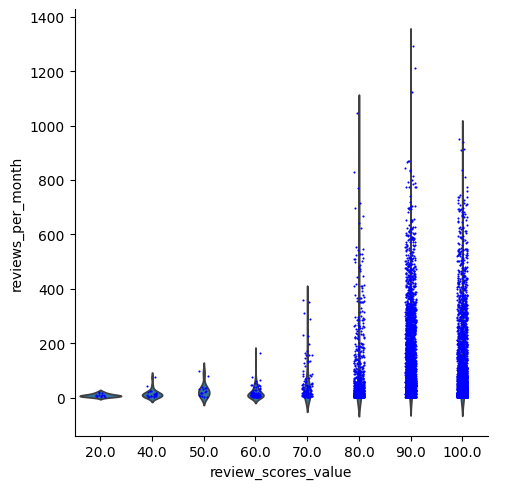

In [87]:
g = sns.catplot(data=df, x='review_scores_value', y='reviews_per_month', kind="violin", inner=None)
sns.stripplot(data=df, x='review_scores_value', y='reviews_per_month', color="b", size=1.5, ax=g.ax)

## KPI 4 - Ítem con la mayor puntuación promedio

In [88]:
# Diccionario para traducir los nombres de las columnas de evaluación específicas
traducciones = {
    'review_scores_accuracy': 'Precisión',
    'review_scores_cleanliness': 'Limpieza',
    'review_scores_checkin': 'Registro',
    'review_scores_communication': 'Comunicaciones',
    'review_scores_location': 'Ubicación'
}

# Columnas originales
cols = list(traducciones.keys())

# Calcular la media de cada una (ignorando NaN)
mean_scores = df[cols].mean().rename(traducciones)

print(mean_scores)

# Mostrar la métrica con mayor media
max_metric = mean_scores.idxmax()
max_value = mean_scores.max()

print(f"La métrica con la mayor puntuación promedio es: {max_metric} con un valor de {max_value:.2f}")

Precisión         94.537467
Limpieza          93.113614
Registro          96.256844
Comunicaciones    96.338635
Ubicación         95.270495
dtype: float64
La métrica con la mayor puntuación promedio es: Comunicaciones con un valor de 96.34


Representación gráfica

[Text(0, 0, '93.11'),
 Text(0, 0, '94.54'),
 Text(0, 0, '95.27'),
 Text(0, 0, '96.26'),
 Text(0, 0, '96.34')]

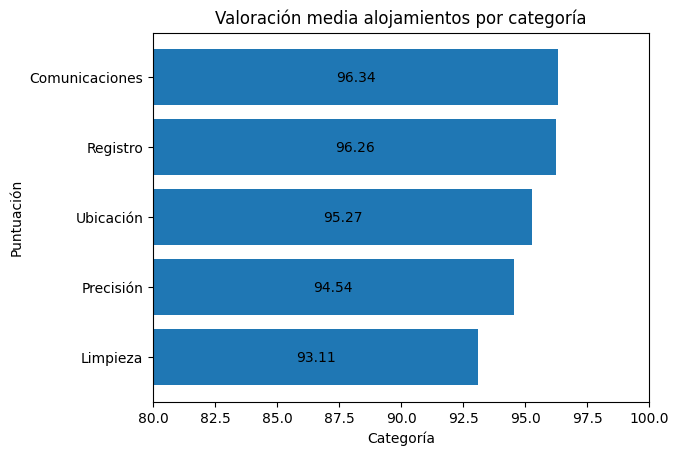

In [89]:
mean_sorted = mean_scores.sort_values(ascending=True)
plt.barh(mean_sorted.index, mean_sorted.values)
plt.xlim(80, 100)
plt.xlabel('Categoría')
plt.ylabel('Puntuación')
plt.title('Valoración media alojamientos por categoría')
plt.bar_label(plt.gca().containers[0], fmt='%.2f', label_type='center')

Gráfica de radar para representar las puntuaciones

In [90]:
#Trazamos la gráfica de radar

fig = px.line_polar(df, r=mean_scores.values, theta=mean_scores.index, range_r=(90, 100), line_close=True)
fig.update_traces(fill='toself')

#Añadimos los valores

fig.add_trace(go.Scatterpolar(
    r=mean_scores.values,
    theta=mean_scores.index,
    mode='markers+text',
    marker=dict(color='blue', size=5, symbol='circle'),
    text=mean_scores.values.round(2),
    textposition='top center',
    name='Valores',
    showlegend=False
))

#Marcamos el valor máximo

fig.add_trace(go.Scatterpolar(
    r=[max_value],
    theta=[max_metric],
    mode='markers',
    marker=dict(color='red', size=10, symbol='circle'),
    name='Valor máximo',
    showlegend=False
))

### Respuestas de negocio

#### Sprint 01

Puntuación media de los usuarios

In [91]:
media_valor = df['review_scores_value'].mean()
print(f"Puntuación media otorgada por los usuarios: {media_valor:.2f}")

Puntuación media otorgada por los usuarios: 91.40


 Porcentaje de alojamientos por ciudad que superan una puntuación de 80

In [92]:

# Crear una columna booleana para marcar los que superan 80
df['supera_80'] = df['review_scores_value'] > 80

# Agrupar por ciudad y calcular el porcentaje
porcentaje_por_ciudad = (
    df.groupby('city')['supera_80']
    .mean().sort_values(ascending=False) * 100
).round(2)

print(pd.DataFrame(porcentaje_por_ciudad))


           supera_80
city                
sevilla        83.62
valencia       80.83
malaga         77.16
madrid         72.52
barcelona      64.97
menorca        58.68
mallorca       56.52
girona         51.67


In [93]:
porcentaje_por_ciudad.info()

<class 'pandas.core.series.Series'>
Index: 8 entries, sevilla to girona
Series name: supera_80
Non-Null Count  Dtype  
--------------  -----  
8 non-null      float64
dtypes: float64(1)
memory usage: 128.0+ bytes


In [94]:
porcentaje_por_ciudad = pd.DataFrame(porcentaje_por_ciudad)
porcentaje_por_ciudad.info()
                                     

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, sevilla to girona
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   supera_80  8 non-null      float64
dtypes: float64(1)
memory usage: 128.0+ bytes


/var/folders/zd/c44thsy53rq3c4k8x7lqbfdh0000gn/T/ipykernel_1110/1923502712.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




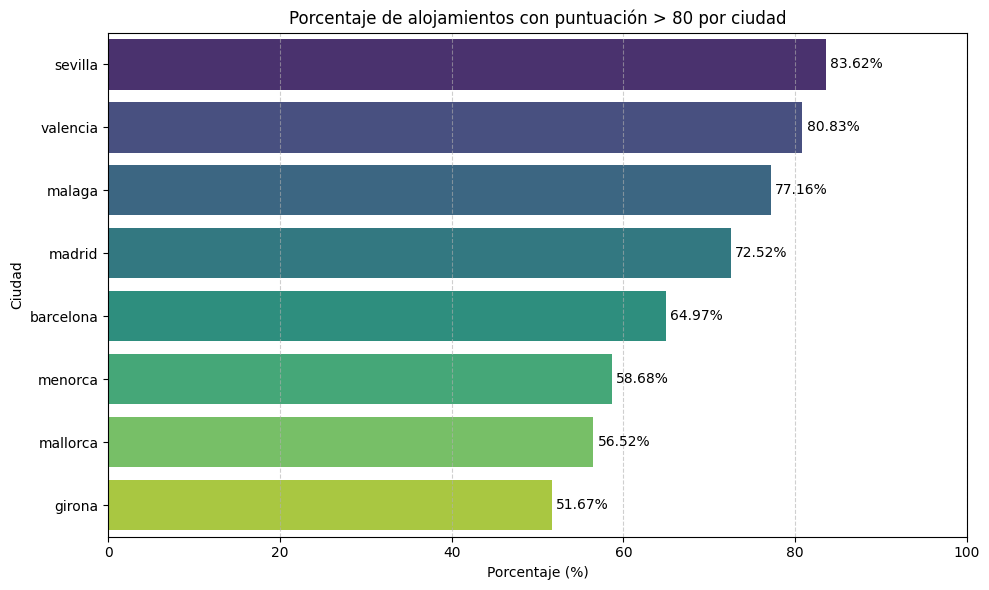

In [95]:
# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=porcentaje_por_ciudad, x='supera_80', y='city', palette='viridis')

# Anotar porcentajes
for index, row in porcentaje_por_ciudad.iterrows():
    plt.text(row['supera_80'] + 0.5, index, f"{row['supera_80']}%", va='center')

# Ajustes visuales
plt.title('Porcentaje de alojamientos con puntuación > 80 por ciudad')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Ciudad')
plt.xlim(0, 100)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Sprint 02

¿Qué aspectos (precisión, higiene, registro o comunicaciones) presentan mayores diferencias entre los alojamientos mejor y peor valorados en la evaluación general? 

In [96]:
cols.remove('review_scores_location')
print(cols)

['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication']


El aspecto con la valoración más dispar es: Limpieza con una diferencia de 80.00 puntos


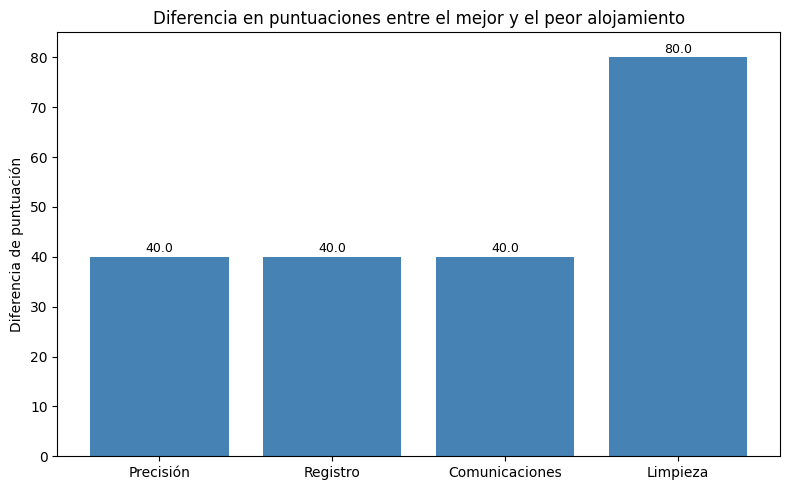

In [97]:
# Eliminar filas con valores nulos en estas columnas y en la puntuación global

df_clean = df.dropna(subset=cols + ['review_scores_value'])

# Identificar el alojamiento mejor y peor valorado
mejor = df.loc[df['review_scores_value'].idxmax()]
peor = df.loc[df['review_scores_value'].idxmin()]

# Calcular diferencias
diferencias = (mejor[cols] - peor[cols]).sort_values().rename(traducciones)

max_item = diferencias.idxmax()
max_diferencia = diferencias.max()

print(f"El aspecto con la valoración más dispar es: {max_item} con una diferencia de {max_diferencia:.2f} puntos")

# Gráfico
plt.figure(figsize=(8, 5))
bars = plt.bar(diferencias.index, diferencias.values, color='steelblue')
plt.title('Diferencia en puntuaciones entre el mejor y el peor alojamiento', fontsize=12)
plt.ylabel('Diferencia de puntuación')
plt.ylim(0, max(diferencias.values) + 5)

# Etiquetas encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, f'{yval:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()


In [98]:
mejor

apartment_id                                                            17249166
name                                                            Arquitecte gaudi
description                    Nuevo apartamento c�ntrico con buenos acabados...
host_id                                                                109461701
neighbourhood_name                                                         Roses
neighbourhood_district                                                       NaN
room_type                                                        Entire home/apt
accommodates                                                                   5
bathrooms                                                                    1.0
bedrooms                                                                     2.0
beds                                                                         4.0
amenities_list                 Host greets you, Extra pillows and blankets, W...
price                       

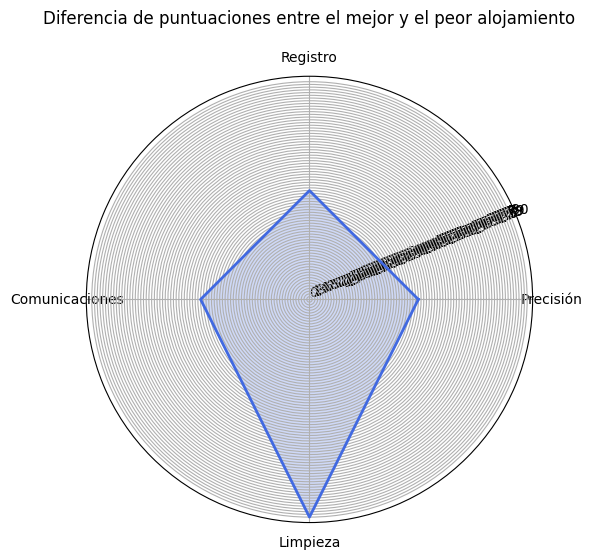

In [99]:
# Gráfica de radar matplotlib

# Preparar datos para el radar
labels = diferencias.index.tolist()
values = diferencias.values.tolist()
num_vars = len(labels)

# Ángulos para cada eje
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

# Crear gráfico
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, values, color='royalblue', linewidth=2)
ax.fill(angles, values, color='royalblue', alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(0, max(values)+1, 1))
ax.set_title("Diferencia de puntuaciones entre el mejor y el peor alojamiento", y=1.1, fontsize=12)

plt.tight_layout()

In [100]:
# Gráfica de radar plotly

#Trazamos la gráfica de radar

fig = px.line_polar(df, r=diferencias.values, theta=diferencias.index, range_r=(0, 100), line_close=True)
fig.update_traces(fill='toself')

#Añadimos los valores

fig.add_trace(go.Scatterpolar(
    r=diferencias.values,
    theta=diferencias.index,
    mode='markers+text',
    marker=dict(color='blue', size=5, symbol='circle'),
    text=diferencias.values,
    textposition='top center',
    name='Valores',
    showlegend=False
))

#Marcamos el valor máximo

fig.add_trace(go.Scatterpolar(
    r=[max_diferencia],
    theta=[max_item],
    mode='markers',
    marker=dict(color='red', size=10, symbol='circle'),
    name='Valor máximo',
    showlegend=False
))

Vamos a intentar segmentar por ciudad y tipo de alojamiento

In [101]:
valor_max = df['review_scores_value'].max()
print(valor_max)
filtro_max = df['review_scores_value']==valor_max
df_max = df[filtro_max]
df_max

100.0


,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,normalized_amenities,days_occupied,occupancy_rate,supera_80
0,17249166,Arquitecte gaudi,Nuevo apartamento c�ntrico con buenos acabados...,109461701,Roses,NaN,Entire home/apt,5,1.0,2.0,...,100.0,FALSO,9.0,spain,girona,2021-02-27,"iron, host greets you, long term stays allowed...",30,100.000000,True
3,26207763,Casa Flor.....somewhere different,"Built in the late 1950's, Casa Flor is a detac...",196976392,L'Escala,NaN,Entire home/apt,2,1.0,1.0,...,100.0,FALSO,12.0,spain,girona,2021-02-27,"first aid kit, dining table, barbecue utensils...",30,100.000000,True
10,18544317,GOOD SPOT EMPURIABRAVA,GOOD SPOT EMPURIABRAVA is a modern fully-equip...,60510464,Castell� d'Emp�ries,NaN,Entire home/apt,4,1.0,1.0,...,100.0,FALSO,12.0,spain,girona,2021-02-27,"first aid kit, crib, oven, bed linens, high ch...",30,100.000000,True
11,21577762,Rustic Chic Studio Downtown (C80),Welcome to our brand new apartment in the cent...,5890675,Centro,NaN,Entire home/apt,2,1.0,1.0,...,100.0,VERDADERO,245.0,spain,malaga,2021-02-27,"balcony, nespresso machine, microwave, hair dr...",30,100.000000,True
14,15248525,"appt dans villa � Llansa ,beau jardin,terrasse",Mon logement est proche de la plage et des com...,84213236,Llan��,NaN,Entire home/apt,6,1.0,2.0,...,100.0,FALSO,66.0,spain,girona,2021-02-27,"oven, balcony, microwave, essentials, pool, wa...",0,0.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7670,1198074,005596_APARTAMENTO DE 2 DORMITORIOS,!!!-ATTENTION-!!! HERE YOU HAVE THE CHANCE FOR...,6544866,la Dreta de l'Eixample,Eixample,Entire home/apt,4,2.0,2.0,...,100.0,VERDADERO,39.0,spain,barcelona,2017-01-04,"iron, dryer, hair dryer, internet, tv, bathroo...",14,46.666667,True
7673,936781,Park G�ell Apartment.Ideal families,Inscripci� en el Registre de Turisme de Catalu...,5057234,la Salut,Gr�cia,Entire home/apt,4,1.0,2.0,...,100.0,FALSO,175.0,spain,barcelona,2017-01-04,"essentials, internet, tv, air conditioning, wa...",5,16.666667,True
7681,13877909,Charming Sunny Room in the Centre,Charming room for two in the center of Barcelo...,82104517,la Nova Esquerra de l'Eixample,Eixample,Private room,2,1.0,1.0,...,100.0,FALSO,229.0,spain,barcelona,2017-01-04,"iron, first aid kit, breakfast, hair dryer, tv...",2,6.666667,True
7685,1756975,CHIC & CHEAP ;),Hola! Welcome to Barcelona ;) Located in one o...,8965423,Vilapicina i la Torre Llobeta,Nou Barris,Entire home/apt,5,1.0,2.0,...,100.0,FALSO,97.0,spain,barcelona,2017-01-04,"iron, hair dryer, internet, bathroom essential...",26,86.666667,True


In [102]:
valor_min = df['review_scores_value'].min()
print(valor_min)
filtro_min = df['review_scores_value']==valor_min
df_min = df[filtro_min]
df_min

20.0


,apartment_id,name,description,host_id,neighbourhood_name,neighbourhood_district,room_type,accommodates,bathrooms,bedrooms,...,review_scores_value,is_instant_bookable,reviews_per_month,country,city,insert_date,normalized_amenities,days_occupied,occupancy_rate,supera_80
129,20201831,Cosy and beautiful flat in the heart of Barcelona,Bienvenidos! Venid y sentiros como en casa en ...,12981701,la Dreta de l'Eixample,Eixample,Entire home/apt,2,1.0,1.0,...,20.0,FALSO,5.0,spain,barcelona,2021-02-09,"iron, long term stays allowed, bathroom essent...",0,0.000000,False
279,31306749,CONOCE MADRID A UN PRECIO RAZONABLE,"Hola, la habitaci�n tiene ventanales muy grand...",179816191,Palomeras Bajas,Puente de Vallecas,Private room,1,1.0,1.0,...,20.0,VERDADERO,7.0,spain,madrid,2021-01-12,"iron, private entrance], essentials, tv, bathr...",30,100.000000,False
335,32229216,Apartamento en la playa ideal para familias,"Apartamento de 38m2 con dos dormitorios, uno c...",241837723,Es Mercadal,NaN,Entire home/apt,4,1.0,2.0,...,20.0,FALSO,6.0,spain,menorca,2020-12-30,"hair dryer, tv, bathroom essentials, fire safe...",30,100.000000,False
727,29530449,Sup Terraza RMST � Murmuri Residence Mercader...,<b>The space</b><br />Ven a estrenar este apar...,93598470,la Dreta de l'Eixample,Eixample,Entire home/apt,4,2.0,1.0,...,20.0,VERDADERO,5.0,spain,barcelona,2020-10-12,"iron, hair dryer, tv, bathroom essentials, fir...",2,6.666667,False
1293,20438732,The flair of Ibiza on the coast � Casa Morr�s 45,The Casa Morr�s 45 is situated in the holiday ...,142978193,Felanitx,NaN,Entire home/apt,5,2.0,2.0,...,20.0,VERDADERO,4.0,spain,mallorca,2020-05-28,"iron, nespresso machine, balcony, refrigerator...",0,0.000000,False
1313,27943335,Macarena - 118.1,"Macarena, 3-room terraced house on 2 levels. A...",107255064,Tossa de Mar,NaN,Entire home/apt,5,1.0,2.0,...,20.0,VERDADERO,11.0,spain,girona,2020-05-28,"balcony, private living room, microwave, tv, s...",30,100.000000,False
2211,27824712,"Danna, Friendly Rentals","This apartment has: 1 double bed, 4 single bed...",102947901,SANT FRANCESC,CIUTAT VELLA,Entire home/apt,6,2.0,3.0,...,20.0,VERDADERO,16.0,spain,valencia,2019-12-31,"iron, hair dryer, tv, air conditioning, washer...",3,10.000000,False
3844,23248190,Sunny room in Plaza Espa�a,Luminous room for rent in a large apartment lo...,172993215,ARRANCAPINS,EXTRAMURS,Private room,1,2.0,1.0,...,20.0,FALSO,1.0,spain,valencia,2019-05-01,"luggage dropoff allowed, oven, lock on bedroom...",30,100.000000,False
5412,28009424,Best location Beautiful room,"Habitaci�n en el Paseo Mar�timo de Palma, a 10...",211483828,Palma de Mallorca,NaN,Private room,2,1.0,1.0,...,20.0,VERDADERO,10.0,spain,mallorca,2018-10-17,"first aid kit, oven, lock on bedroom door, mic...",30,100.000000,False
5553,19247709,CRISSON,Villa about 300m from the beach Montg� and sho...,134761428,L'Escala,NaN,Entire home/apt,6,2.0,3.0,...,20.0,VERDADERO,16.0,spain,girona,2018-09-28,"iron, internet, tv, smoking allowed, air condi...",2,6.666667,False
